In [1]:
!pip install xmltodict

In [93]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [94]:
data_folder = "data/KZT"
all_data = []
#loading in all the data from data file from quest 1

In [95]:
#this was from ai 
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [96]:
for filename in os.listdir(data_folder):
    if filename.endswith(".json"):
        file_path = os.path.join(data_folder, filename)
        try:
            with open(file_path, "r", encoding = "utf-8") as f:
                data = json.load(f)
                date = filename.replace(".json", "")
                items = data["channel"]["item"]
                for entry in items:
                    all_data.append({
                        "date": date,
                        "base": entry["baseCurrency"],
                        "targetCurrency": entry["targetCurrency"],
                        "rate": float(entry["exchangeRate"])
                    })
        except Exception as e:
            print(f"Error reading {filename}: {e}")
        #loading and going thru all data only focusing on those main categories

In [97]:
df = pd.DataFrame(all_data)
df["date"] = pd.to_datetime(df["date"])
df.sort_values("date", inplace = True)
df.head()
#a dataframe to sort values for each date in the file and putting them in order

,date,base,targetCurrency,rate
0,2011-05-04,KZT,EUR,0.004609
29,2011-05-04,KZT,PLN,0.018165
30,2011-05-04,KZT,QAR,0.024967
31,2011-05-04,KZT,RUB,0.187414
32,2011-05-04,KZT,SAR,0.025722


In [98]:
major_currencies = ["USD", "EUR", "GBP", "JPY", "CNY"]
df_major = df[df["targetCurrency"].isin(major_currencies)]
#adding a small filter to only look at certain currencies

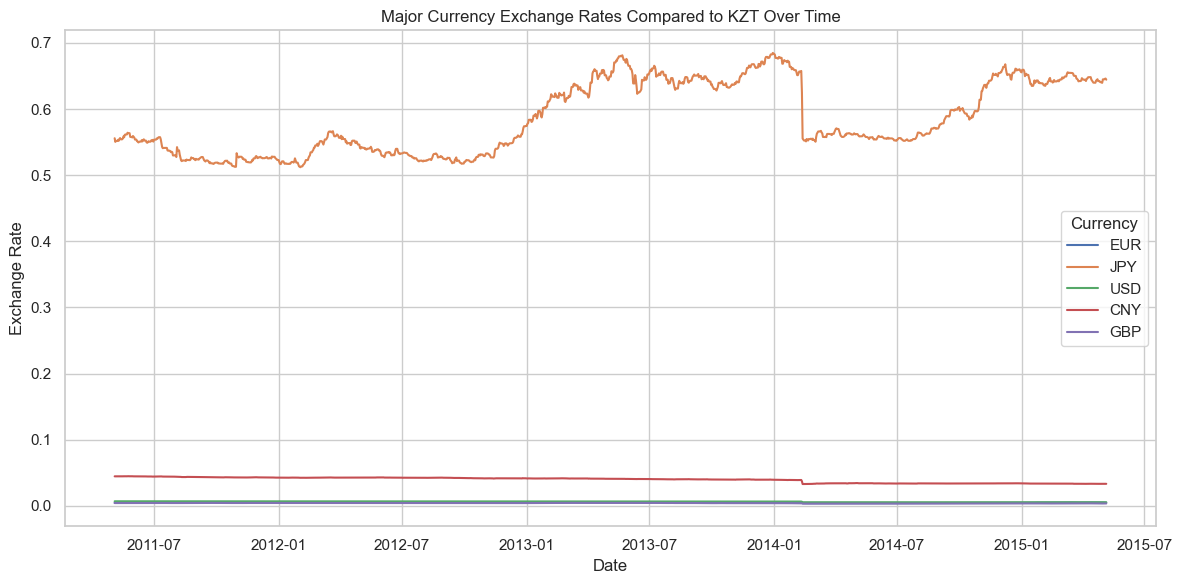

In [99]:
sns.lineplot(data=df_major, x = "date", y = "rate", hue = "targetCurrency")
plt.title("Major Currency Exchange Rates Compared to KZT Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend(title = "Currency")
plt.tight_layout()
plt.show()
#just plotting exchange rates over time to compare

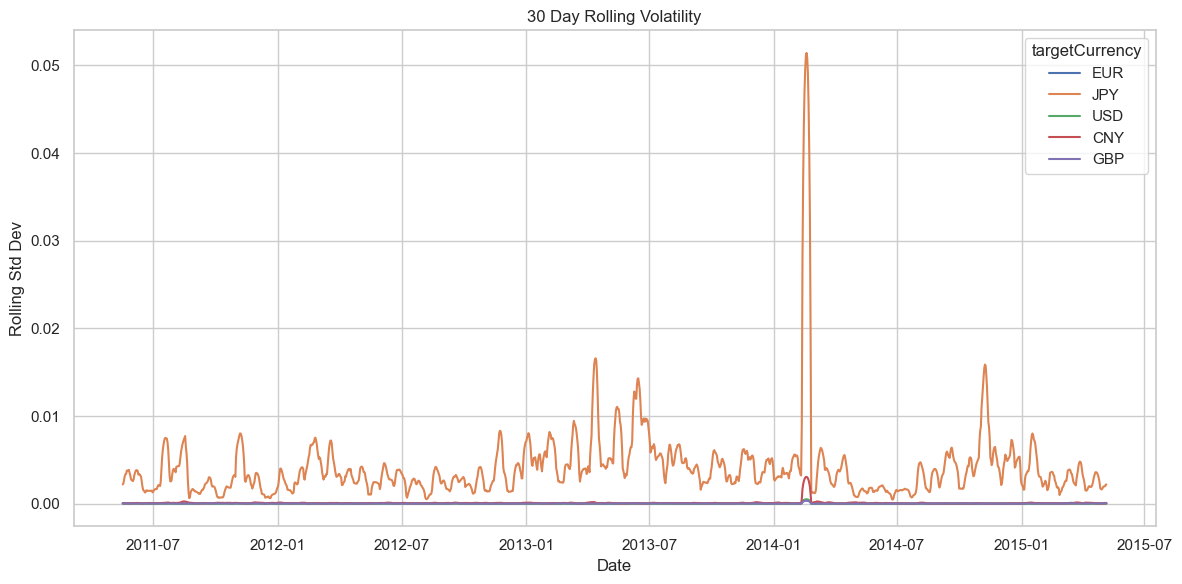

In [100]:
df_major = df[df["targetCurrency"].isin(major_currencies)].copy()
df_major["rolling_std"] = df_major.groupby("targetCurrency")["rate"].transform(lambda x: x.rolling(window = 14).std())
sns.lineplot(data = df_major, x = "date", y = "rolling_std", hue = "targetCurrency")
plt.title("30 Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Rolling Std Dev")
plt.tight_layout()
plt.show()
#plotting to show how much this currency is bound to change when or if something happened during that time

as seen in graph a global event happened to help the STD rate increase around 2014

In [102]:
print(df["targetCurrency"].value_counts())
#had to test to see how many its counting because there wasnt enough data showing at first

targetCurrency
EUR    1464
TTD    1464
NOK    1464
USD    1464
DZD    1464
       ... 
AZN     204
AMD     204
KGS     204
VND      98
PGK      97
Name: count, Length: 82, dtype: int64


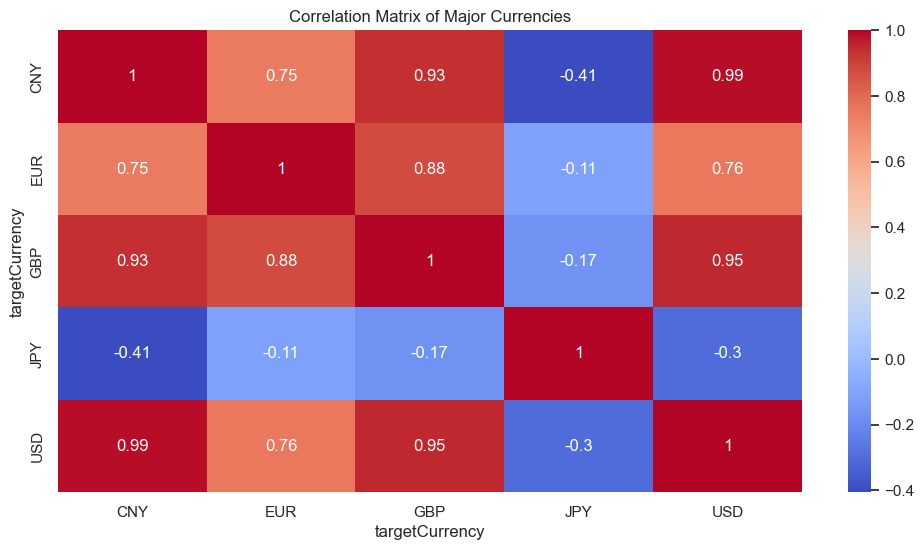

In [103]:
pivot_df = df_major.pivot(index = "date", columns = "targetCurrency", values = "rate").dropna()
sns.heatmap(pivot_df.corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix of Major Currencies")
plt.show()
#showing the correlation between each currency and how they could affect each other

From this data I could see how CNY has some of the lowest volatility, meybe due to their strict currency controls

JPY has a seperate or not as correleated currency with others from the major offset but did move with everyone else in 2014

In [ ]:
#all_data = load_data(base_currency)
#all_data["date"] = pd.to_datetime(all_data["date"])
#columns_to_keep = ["date"] + major_targets
#filtered_data = all_data[columns_to_keep]
#filtered_data["date"] = pd.to_datetime(filtered_data["date"])

Error parsing 2011-05-04.json: 'date'
Error parsing 2011-05-05.json: 'date'
Error parsing 2011-05-06.json: 'date'
Error parsing 2011-05-07.json: 'date'
Error parsing 2011-05-08.json: 'date'
Error parsing 2011-05-09.json: 'date'
Error parsing 2011-05-10.json: 'date'
Error parsing 2011-05-11.json: 'date'
Error parsing 2011-05-12.json: 'date'
Error parsing 2011-05-13.json: 'date'
Error parsing 2011-05-14.json: 'date'
Error parsing 2011-05-15.json: 'date'
Error parsing 2011-05-16.json: 'date'
Error parsing 2011-05-17.json: 'date'
Error parsing 2011-05-18.json: 'date'
Error parsing 2011-05-19.json: 'date'
Error parsing 2011-05-20.json: 'date'
Error parsing 2011-05-21.json: 'date'
Error parsing 2011-05-22.json: 'date'
Error parsing 2011-05-23.json: 'date'
Error parsing 2011-05-24.json: 'date'
Error parsing 2011-05-25.json: 'date'
Error parsing 2011-05-26.json: 'date'
Error parsing 2011-05-27.json: 'date'
Error parsing 2011-05-28.json: 'date'
Error parsing 2011-05-29.json: 'date'
Error parsin

KeyError: 'date'

In [ ]:
#time_series_df = filtered_data.pivot(index="date", columns = "targetCurrency", value = "exchangeRate")

NameError: name 'filtered_data' is not defined